<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch07_CouplesVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch06 - Notebook : Couples de Variables Aléatoires Discrètes**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

Un fabricant fournit des kits d’entretien composés d’un produit détartrant (produit A) et d’un produit dégraissant (produit B). Pour rendre service à ses clients, un détaillant accepte de leur vendre ces produits séparément.

On fait les hypothèses suivantes :
* Au début de la journée, il ne reste aucune boîte entamée ;
* Chaque client qui se présente chez le détaillant n’achète qu’un seul des deux produits ;
* Chaque client achète le produit A avec la probabilité $0 < p < 1$ et le produit B avec la probabilité $q = 1−p$ ; 
* Les choix des clients (produit A ou produit B) sont indépendants.

On note $X$ (resp. $Y$), le nombre de produits A (resp. de produits B) vendus dans la journée et on pose $Z = max\{X, Y\}$.
1. On considère une journée où 4 clients se sont présentés.
*  a. Déterminer la loi de $X$, la loi de $Y$ et les espérances de ces variables aléatoires.
*   b. Que représente la variable aléatoire $Z$ ? Déterminer la loi de $Z$.

Dans la suite du sujet, on suppose que le nombre de clients qui se présentent chez le commerçant durant une journée est une variable aléatoire $N$ qui suit la loi de Poisson de paramètre $\lambda > 0$.

2. Soit $n \in \mathbb{N}$. Quelle est la loi conditionnelle de $X$ sachant
que l’événement $[N = n]$ est réalisé ?
3. Déterminer la loi conjointe du couple $(X,N)$.
4. En déduire la loi de $X$. Donner (sans calcul) les valeurs de $E(X)$ et $E(Y)$.
5. Démontrer que les variables aléatoires $X$ et $Y$ sont indépendantes.
6. En utilisant la relation $N = X + Y$, calculer $Cov(X,N)$.
7. Pour $k \in \mathbb{N}$ et $x \in \mathbb{R}$, on note
$S(k,x) = \sum_{j=0}^{k} \frac {x^j}{j!}$. Exprimer $P (Z \leqslant k)$ en fonction de $\lambda$, de $S(k, \lambda . p)$ et de $S(k, \lambda .q)$.
8. Dans cette question, on utilise le langage de programmation Python.
On suppose que $p = \frac{1}{2}$, que  $\lambda= 10$ et qu’au début de la journée, le détaillant dispose de cinq kits d’entretien exactement, aucun d’eux n’étant entamé.
*  a. Proposer une fonction *S(k,x)* qui calcule la valeur de $S(k, x)$ en fonction des données $k$ et $x$.
*  b. Écrire des instructions Python permettant de calculer la probabilité pour que le détaillant tombe en rupture de stock au cours de la journée.
9. Écrire une fonction *simulation(n)* en langage Python qui retourne un échantillon $T = \left [ \left( X_k(\omega), Y_k(\omega), Z_k(\omega) \right ) \right ] \in \mathfrak{M}_{n,3} \left (\mathbb{N} \right )$ de n réalisations indépendantes de l’expérience.
10. Comment utiliser le tableau $T$ pour représenter graphiquement la loi de $X$ ? la loi de $Z$ ? pour estimer graphiquement $Cov(X,N)$ ?

**Calcul de $S(x,k)$** :

In [1]:
def S(k,x):
    s, u = 1, 1         # S(0, x) , u0(x)!
    for i in range(k):  # ∀ 0 6 i < k
        u = u*x/(i+1)   # ui+1(x)
        s = s+u         # S(i + 1, x) = S(i, x) + ui+1(x)
    return s            # S(k, x)

In [2]:
S(5,5)


91.41666666666666

**Calcul de la probabilité de rupture de stock :**

In [3]:
from math import exp 

#Probabilité de rupture
PrRupture = 1 - exp(-10)*S(5,5)**2
PrRupture

0.6205924716976241

**Simulation de n expériences :**

In [4]:
import numpy as np
import numpy.random as rd

def simulation(n):
    p = 1/2
    lbd = 10
    T = np.zeros((n, 3))
    for i in range(n):
        N = rd.poisson(lbd)
        X = rd.binomial(N, p)
        Y = N-X
        T[i,0] = X
        T[i,1] = Y
        T[i,2] = np.max([X, Y])
    return T

In [5]:
simulation(4)

array([[2., 6., 6.],
       [4., 8., 8.],
       [5., 8., 8.],
       [6., 5., 6.]])

Variante utilisant l'indépendance de X et Y :

In [6]:
def simulation(n):
    p, lbd = 1/2, 10
    T = np.zeros((n,3))
    for i in range(n):
        T[i,0] = rd.poisson(lbd*p)
        T[i,1] = rd.poisson(lbd*(1-p))
        T[i,2] = np.max(T[i,:2])
    return T

In [7]:
simulation(4)

array([[5., 5., 5.],
       [6., 5., 6.],
       [4., 2., 4.],
       [3., 3., 3.]])

**Simulation sur un grand nombre d'expériences :**

In [13]:
T = simulation(10**5)
X, Y, Z = T[:,0], T[:,1], T[:,2]
N = X+Y

**Représentations graphiques :**

Pour représenter graphiquement les lois de X et de Z,
le plus simple est de tracer un histogramme.

Le paramètre "*density = True*" permet de tracer le polygone des fréquences.

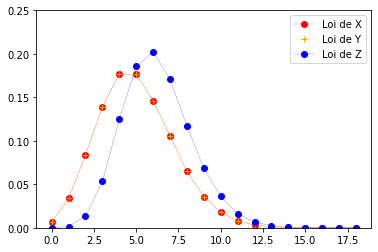

In [58]:
import matplotlib.pyplot as plt

b = list(range(20))
x, t = np.histogram(X, bins=b, density=True)
plt.plot(t[:-1], x, marker = 'o', color = 'red', label="Loi de X",linewidth = 0.2)
y, t = np.histogram(Y, bins=b, density=True)
plt.plot(t[:-1], x, marker = '+', color = 'orange', label="Loi de Y", linewidth = 0.2)
z, t = np.histogram(Z, bins=b, density=True)
plt.plot(t[:-1], z, marker = 'o', color = 'blue', label="Loi de Z", linewidth = 0.2)
plt.ylim(0, 0.25)
plt.legend()

Pour estimer la corrélation des variables $X$ et $N$, le plus simple est de tracer le nuage de points $(X_k,N_k)$ pour $ 0\leqslant n$.

Text(0.5, 1.0, 'Nuage de points $(X_k,N_k)$')

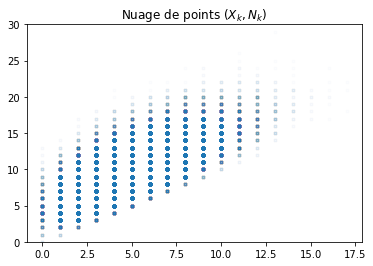

In [42]:
plt.scatter(X, N, marker = '.', alpha = 0.01) # Nuage de point s
plt.ylim(0, 30)
plt.title("Nuage de points $(X_k,N_k)$", size=12)

On voit bien que $N$ a tendance à être une fonction croissante de $X$, ce qui justifie d’avoir trouvé une covariance strictement positive.

Même avec un réglage de transparence il n'est pas aisé d'accentuer les points de plus haute fréquence.

Voici un autre graphique. Attention : l'origine est en haut à gauche, l'axe des abscisse est vertical dirigé vers le bas.

Text(0, 0.5, 'X')

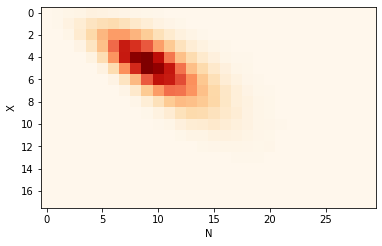

In [53]:
Xmax = int(np.max(X))
Nmax = int(np.max(N))
F = np.array(np.zeros((Xmax+1, Nmax+1)))
# On compte le nombre d' occurrences de chaque point du nuage
for x,n in zip(X,N) :
    F[int(x), int(n)] += 1
plt.imshow(F, cmap='OrRd')
plt.xlabel("N")
plt.ylabel("X")